In [37]:
import pandas as pd
import numpy as np
from os import listdir
import json

COLUMNS = ["name", "city", "description", "stars", "price", "rating", "reviews", "image", "images",
           "categoryReviews", "userReviews"]
CATEGORIES = ["staff", "facilities", "cleanliness", "comfort", "valueForMoney", "location"]
RCATEGORIES = ["staff", "facilities", "cleanliness", "comfort", "location"]

# reads the file and selects columns
dataframes = []
for file in listdir("../data/listings/"):
    temp_df = pd.read_json(f"../data/listings/{file}")
    temp_df["city"] = file[:-12]
    temp_df = temp_df[COLUMNS]
    dataframes.append(temp_df)
df = pd.concat(dataframes)

# create columns based on review categories
for i, var_name in enumerate(CATEGORIES):
    df[var_name] = df["categoryReviews"].str[i].str['score']

# if duplicate or no reviews are available, drop row
df = df[df["reviews"] > 0]
df = df.dropna()
df = df.drop_duplicates(subset=["name", "city"])

# normalize the values of numerical attributes and adjust buggy prices
df.loc[df["price"] < 5, "price"] = 1000 * df.loc[df["price"] < 10, "price"]
for column in ["stars", "reviews", "rating"] + CATEGORIES:
    df[column] = (df[column] - np.mean(df[column])) / np.std(df[column])

# add the one-hot-encoding for cities
df = pd.concat([df, pd.get_dummies(df["city"])], axis=1)

# change the price to be in log form
df["price"] = np.log(df["price"])

df = df.reset_index(drop=True)

# obtain a big string with reviews
for i in range(df.shape[0]):
    reviews = df.loc[i, "userReviews"]
    new_string = ""
    for review in reviews:
        try:
            new_string += " ".join((review["title"], review["positive"], review["negative"], " "))
        except TypeError:
            pass

    if len(new_string) == 0:
        new_string = "no reviews"

    df.loc[i, "userReviews"] = new_string

# save it as a csv to be used in other places
df.to_csv("data.csv", index=False)
df

,name,city,description,stars,price,rating,reviews,image,images,categoryReviews,...,new_york,orlando,philadelphia,phoenix,san_antonio,san_diego,san_francisco,san_jose,seattle,toronto
0,The State Hotel,seattle,"The State Hotel features a fitness center, ter...",0.913201,6.212606,0.586815,-0.498419,https://cf.bstatic.com/images/hotel/max1024x76...,[https://cf.bstatic.com/xdata/images/hotel/max...,"[{'title': 'Staff', 'score': 9.1}, {'title': '...",...,0,0,0,0,0,0,0,0,1,0
1,Hotel Theodore,seattle,You're eligible for a Genius discount at Hotel...,0.913201,5.826000,0.779181,0.081387,https://cf.bstatic.com/images/hotel/max1024x76...,[https://cf.bstatic.com/xdata/images/hotel/max...,"[{'title': 'Staff', 'score': 9.2}, {'title': '...",...,0,0,0,0,0,0,0,0,1,0
2,"Kimpton Hotel Monaco Seattle, an IHG Hotel",seattle,"Located in Central Seattle, Kimpton Hotel Mona...",0.913201,6.084499,0.298265,-0.522672,https://cf.bstatic.com/images/hotel/max1024x76...,[https://cf.bstatic.com/xdata/images/hotel/max...,"[{'title': 'Staff', 'score': 8.9}, {'title': '...",...,0,0,0,0,0,0,0,0,1,0
3,Grand Hyatt Seattle,seattle,Less than 10 minutes’ drive from the Space Nee...,2.136803,6.061457,0.875364,-0.224053,https://cf.bstatic.com/images/hotel/max1024x76...,[https://cf.bstatic.com/xdata/images/hotel/max...,"[{'title': 'Staff', 'score': 9.2}, {'title': '...",...,0,0,0,0,0,0,0,0,1,0
4,citizenM Seattle Pioneer Square,seattle,"Attractively set in Seattle, citizenM Seattle ...",0.913201,5.937536,0.779181,-0.024721,https://cf.bstatic.com/images/hotel/max1024x76...,[https://cf.bstatic.com/xdata/images/hotel/max...,"[{'title': 'Staff', 'score': 9.2}, {'title': '...",...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,Hampton Inn & Suites Orlando-Apopka,orlando,"Located in Apopka, Florida, this hotel offers ...",-1.534002,5.062595,0.875364,-0.282413,https://cf.bstatic.com/images/hotel/max1024x76...,[https://cf.bstatic.com/xdata/images/hotel/max...,"[{'title': 'Staff', 'score': 9}, {'title': 'Fa...",...,0,1,0,0,0,0,0,0,0,0
3055,Hyatt Place Orlando/Lake Buena Vista,orlando,"Featuring free WiFi, Hyatt Place Orlando Lake ...",0.913201,5.446737,0.394448,0.229938,https://cf.bstatic.com/images/hotel/max1024x76...,[https://cf.bstatic.com/xdata/images/hotel/max...,"[{'title': 'Staff', 'score': 8.7}, {'title': '...",...,0,1,0,0,0,0,0,0,0,0
3056,Hampton Inn Orlando Near Universal Blv/Interna...,orlando,"Only 1 mi from Universal Studios Florida™, thi...",0.913201,5.187386,-0.182651,0.232970,https://cf.bstatic.com/images/hotel/max1024x76...,[https://cf.bstatic.com/xdata/images/hotel/max...,"[{'title': 'Staff', 'score': 8.3}, {'title': '...",...,0,1,0,0,0,0,0,0,0,0
3057,Homewood Suites by Hilton Orlando-Nearest to U...,orlando,"Experience all of the comforts of home, includ...",-0.310400,5.327876,0.682998,0.526284,https://cf.bstatic.com/images/hotel/max1024x76...,[https://cf.bstatic.com/xdata/images/hotel/max...,"[{'title': 'Staff', 'score': 8.9}, {'title': '...",...,0,1,0,0,0,0,0,0,0,0


In [38]:
df.reset_index(drop=True).loc[0, "userReviews"]

"A hidden gem in the Emerald City of Seattle hotel staff were great to deal with, they helped us with an early check and even upgraded our room due to a bad night sleep in another hotel the night before...... facilities are excellent with free snacks and continental breakfast included.... roof top viewing platform is a plus too...... we would highly recommend nothing, everything was positive  nice place, great location location we booked a sea view but wasn’t given that side of the building  would definitely stay there again super friendly and helpful staff. clean room. comfortable bed. quiet. decent breakfast and snacks. Parking is a little tricky but definitely doable. There is a public parking garage in the next block down the street and the hotel sends a link to set it up. Our room had a view of a brick wall but asked for a quiet room and that's what we got. No fridge in the room but ice available at the front desk. No closet or good place to hang things so we just had huge piles. 

Score: 0.7607149975749508


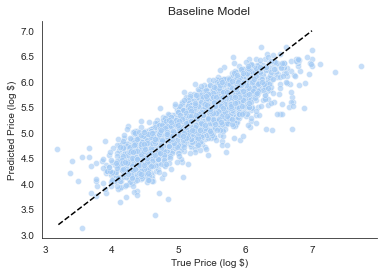

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# run linear regression
X, y = df[["stars", "reviews", "rating"] + RCATEGORIES + list(pd.get_dummies(df["city"]).columns)], df["price"]
reg = LinearRegression().fit(X, y)
predicted = reg.predict(X)
print("Score:", reg.score(X, y))

# plot the data
sns.set_style("white")
sns.set_palette("pastel")
sns.scatterplot(x=y, y=predicted, alpha=0.6)
x_range = np.linspace(3.2, 7, 10)
sns.lineplot(x=x_range, y=x_range, color='k', ls="--")
plt.xlabel("True Price (log $)")
plt.ylabel("Predicted Price (log $)")
plt.title("Baseline Model")
sns.despine()
plt.savefig("../figures/baseline_model.png", dpi=200)
plt.show()

In [40]:
weights = zip(df[["stars", "reviews", "rating"] + RCATEGORIES + list(pd.get_dummies(df["city"]).columns)], reg.coef_)
for i in weights:
    print(i)

('stars', 0.20038299682235322)
('reviews', -0.0712306019824304)
('rating', -0.36093627783227844)
('staff', 0.030954617859324567)
('facilities', 0.2967094297403391)
('cleanliness', -0.04082014640579231)
('comfort', 0.14243230930305228)
('location', 0.16778804207424705)
('austin', -213969909259.83054)
('calgary', -213969909259.87848)
('charlotte', -213969909259.90604)
('chicago', -213969909259.32715)
('columbus', -213969909259.9028)
('dallas', -213969909259.8916)
('denver', -213969909259.43698)
('fort_worth', -213969909260.05203)
('houston', -213969909260.00644)
('indianapolis', -213969909259.67307)
('jacksonville', -213969909259.9164)
('las_vegas', -213969909259.98947)
('los_angeles', -213969909259.33054)
('montreal', -213969909259.7074)
('new_york', -213969909259.19177)
('orlando', -213969909259.84058)
('philadelphia', -213969909259.68994)
('phoenix', -213969909259.85825)
('san_antonio', -213969909259.95392)
('san_diego', -213969909259.16714)
('san_francisco', -213969909259.45117)
('sa